In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("dark_background")

# df = pd.DataFrame(np.random.randn(156, 4), index=range(3*52), columns=list('ABCD')).cumsum()
df = pd.read_csv("1.csv", index_col=0)
df


,A,B,C,D
0,-0.623984,0.013935,0.788854,1.537262
1,-2.196171,-1.245397,1.179048,1.893149
2,-1.723382,-0.133424,0.285150,2.399560
3,-2.178326,-1.489656,0.665613,1.179391
4,-1.373520,-1.617385,-0.448061,0.782043
...,...,...,...,...
151,9.118565,-2.117929,14.761685,12.490452
152,8.423169,-2.299539,14.271794,12.187149
153,8.879773,-3.875022,16.021134,12.526961
154,8.274689,-3.171850,16.275551,13.393588


In [103]:
df.A += 20
df.B += 25
df.C += 30
df.D += 25 
df

,A,B,C,D
0,19.376016,25.013935,30.788854,26.537262
1,17.803829,23.754603,31.179048,26.893149
2,18.276618,24.866576,30.285150,27.399560
3,17.821674,23.510344,30.665613,26.179391
4,18.626480,23.382615,29.551939,25.782043
...,...,...,...,...
151,29.118565,22.882071,44.761685,37.490452
152,28.423169,22.700461,44.271794,37.187149
153,28.879773,21.124978,46.021134,37.526961
154,28.274689,21.828150,46.275551,38.393588


In [104]:
df.reset_index(inplace=True, drop=False)
df["season"] = (2*np.pi*(df.index % 52)/52.0)
df["season"] = df["season"].apply(np.sin)
df.A = df.A+df["season"]*5
df.B = df.B+df["season"]*10
df.C = df.C+df["season"]*7
df.drop(inplace=True, columns=['season', 'index'])
df

,A,B,C,D
0,19.376016,25.013935,30.788854,26.537262
1,18.406513,24.959969,32.022804,26.893149
2,19.473197,27.259733,31.960360,27.399560
3,19.594699,27.056393,33.147847,26.179391
4,20.950095,28.029847,32.805001,25.782043
...,...,...,...,...
151,26.278241,17.201424,40.785232,37.490452
152,26.099553,18.053229,41.018732,37.187149
153,27.106749,17.578929,43.538900,37.526961
154,27.078110,19.434994,44.600341,38.393588


<Axes: >

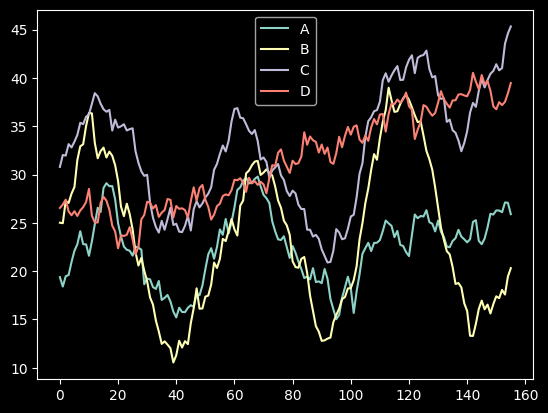

In [105]:
df.plot()

In [106]:
proper_dates = pd.date_range(start="2022-01-01", end="2024-12-31", freq='W')
dates = proper_dates.to_frame().reset_index(drop=True).rename(columns={0: "Date"})
dates

,Date
0,2022-01-02
1,2022-01-09
2,2022-01-16
3,2022-01-23
4,2022-01-30
...,...
152,2024-12-01
153,2024-12-08
154,2024-12-15
155,2024-12-22


In [109]:
data = pd.concat([dates, df], axis=1)
data["year"] = data.Date.dt.year
data

,Date,A,B,C,D,year
0,2022-01-02,19.376016,25.013935,30.788854,26.537262,2022
1,2022-01-09,18.406513,24.959969,32.022804,26.893149,2022
2,2022-01-16,19.473197,27.259733,31.960360,27.399560,2022
3,2022-01-23,19.594699,27.056393,33.147847,26.179391,2022
4,2022-01-30,20.950095,28.029847,32.805001,25.782043,2022
...,...,...,...,...,...,...
152,2024-12-01,26.099553,18.053229,41.018732,37.187149,2024
153,2024-12-08,27.106749,17.578929,43.538900,37.526961,2024
154,2024-12-15,27.078110,19.434994,44.600341,38.393588,2024
155,2024-12-22,25.898870,20.307420,45.325296,39.473493,2024


In [ ]:
for brand in "ABCD":

    with open(f"{brand}.xlsx", 'wb') as excelfile:
        for y in range(2022,2025):            
            sheet_data = data[ data.year == y]
            data.to_excel(data[["Date", brand]],  sheet_name=str(y),  engine='openpyxl')

UnsupportedOperation: read